<a href="https://colab.research.google.com/github/AlejandroPinto5/linear-models/blob/main/linear_regressaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression model**

Here, it is implemented a linear regression model to predict sales of a particular product at a particular outlet. The dataset is previosly cleaned.

In [ ]:
#Importin libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#Importing data
url = 'https://raw.githubusercontent.com/AlejandroPinto5/linear-regression-model/main/train_cleaned.csv'
df = pd.read_csv(url)
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
#Checking stats
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914,0.037076,0.597090,0.338965,0.013141,0.013728,...,0.109351,0.327702,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,6.431899,0.051598,62.275067,8.371760,1706.499616,0.188960,0.490512,0.473386,0.113885,0.116365,...,0.312098,0.469403,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,0.000000,0.000000,31.290000,1985.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Checking variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_LF              8523 non-null   int64  
 6   Item_Fat_Content_Low Fat         8523 non-null   int64  
 7   Item_Fat_Content_Regular         8523 non-null   int64  
 8   Item_Fat_Content_low fat         8523 non-null   int64  
 9   Item_Fat_Content_reg             8523 non-null   int64  
 10  Item_Type_Baking Goods           8523 non-null   int64  
 11  Item_Type_Breads                 8523 non-null   int64  
 12  Item_Type_Breakfast 

In [ ]:
#Checking NaN values
df.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
Item_Fat_Content_LF                0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
O

In [ ]:
#Separating dependent and independent variables
x = df.drop(['Item_Outlet_Sales'], axis = 1)
y = df['Item_Outlet_Sales']

In [ ]:
#Splitting train and test set
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 56)

In [ ]:
#Implementing linear regression
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

lr = LR()
lr.fit(train_x, train_y) #Fitting 
train_predict = lr.predict(train_x) #Predicting over train set
k_train = mae(train_predict, train_y) #Calculating error
print('Train mean absolute error: ', k_train)

Train mean absolute error:  821.4206146753681


In [ ]:
#Predicting over test set
test_predict = lr.predict(test_x)
k_test = mae(test_predict, test_y)  #Calculating error
print('test mean absolute error: ', k_test)

test mean absolute error:  875.2688982985246


Text(0.5, 1.0, 'Coefficient plot')

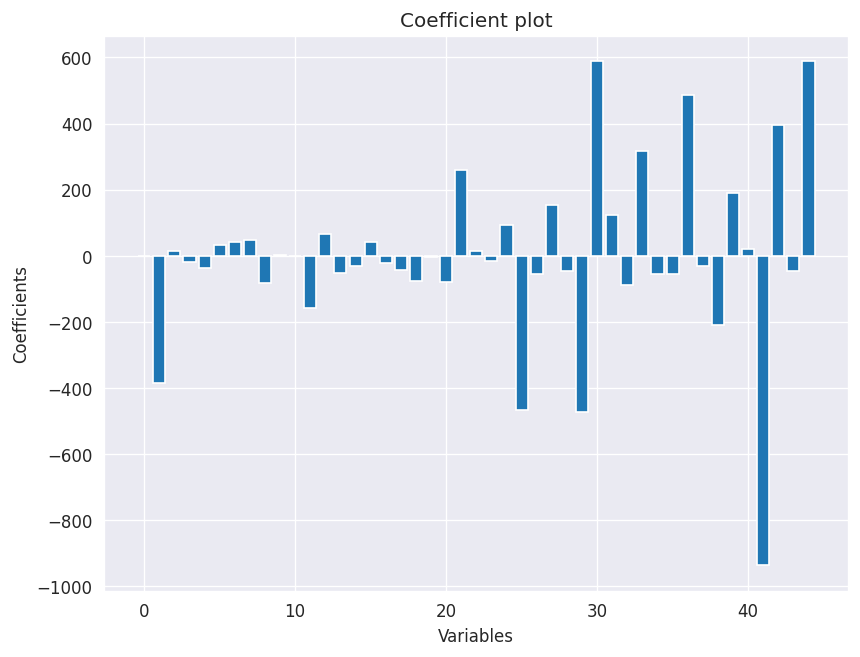

In [ ]:
#Plotting coefficients
lr.coef_
sb.set_style("darkgrid")
plt.figure(figsize = (8,6), dpi = 120, facecolor = 'w', edgecolor = 'b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x,y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

**Conclusion:** the mdoel depends upon some independet variables too much, but these coefficients aren't suitable for interperetation becasue these aren't scaled, therefore, it can do with MinMaxScaler or StandardScaler

In [ ]:
#Checking Assumptions of linear model
# resds = pd.DataFrame({'fitted values': test_y, 'predicted values': test_predict})
# resds['residuals'] = resds['fitted values'] - resds['predicted values']
# resds()
resds = test_y - test_predict
resds.shape

(2131,)

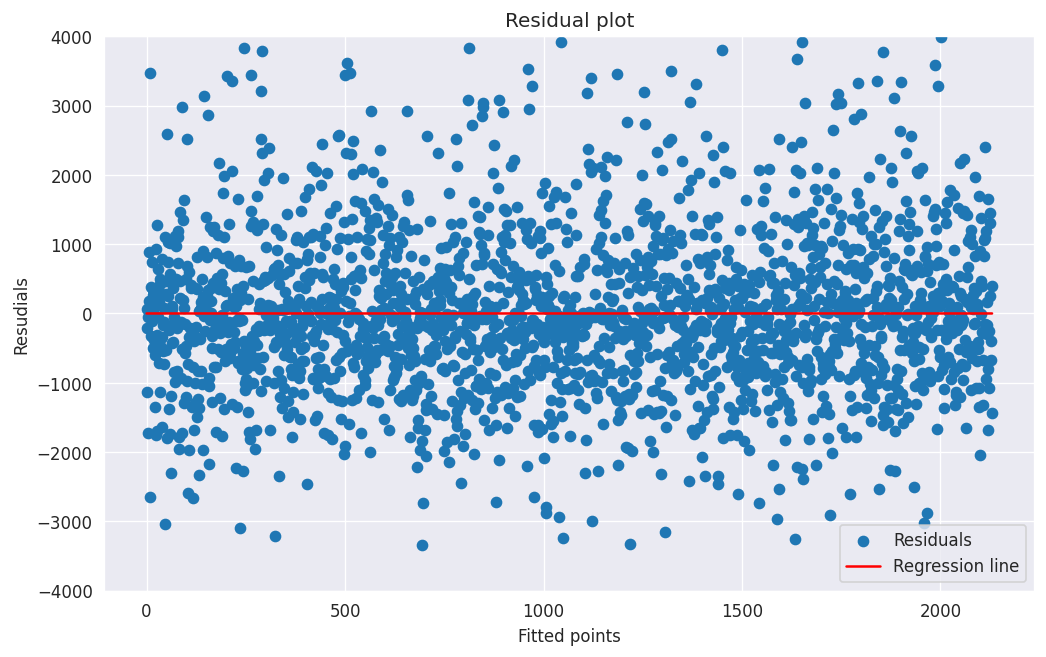

In [ ]:
sb.set_style('darkgrid')
plt.figure(figsize = (10,6),dpi=120, facecolor = 'w', edgecolor = 'b')
f = range(0,2131)
k =  [0 for i in range(0,2131)]
plt.scatter(f, resds[:], label = 'Residuals')
plt.plot(f,k,color = 'red', label = 'Regression line')
plt.xlabel('Fitted points')
plt.ylabel('Resudials')
plt.title('Residual plot')
plt.ylim(-4000,4000)
plt.legend()

**Conclusion:** The residual plot shows a homoscedastic sequence, it doesn't show a pettern niether any correlation between these residuals. The variance of the error across the dataset is nearly constant.


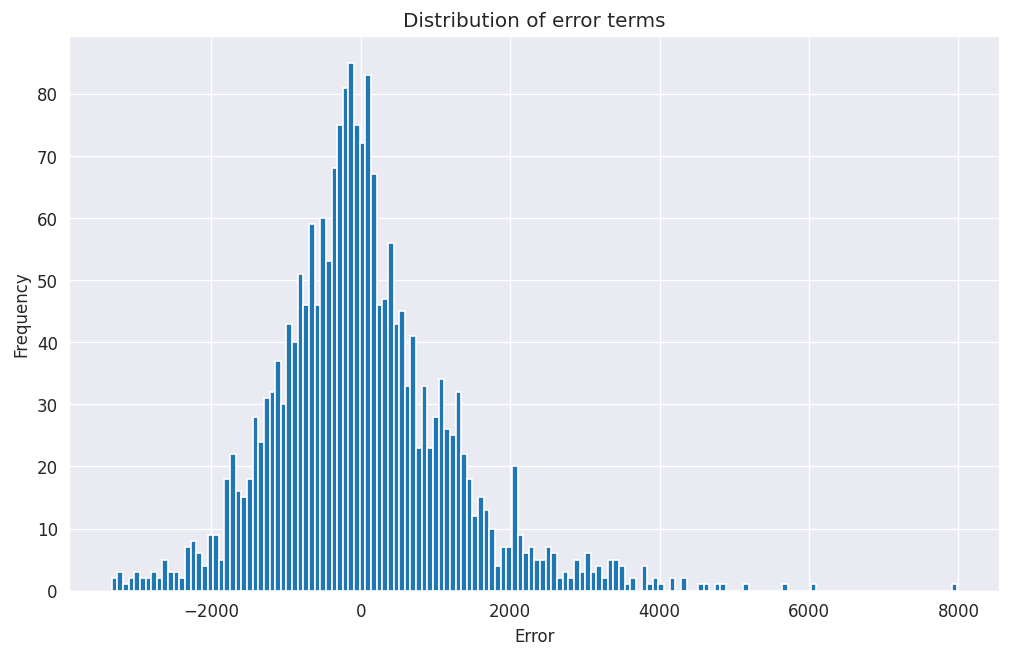

In [ ]:
#Checking distribution of residuals
sb.set_style('darkgrid')
plt.figure(figsize = (10,6), dpi = 120, facecolor = 'w', edgecolor = 'b')
plt.hist(resds,bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of error terms')
plt.show()

**Conclusion:** The plot shows a normal distribution pattern.

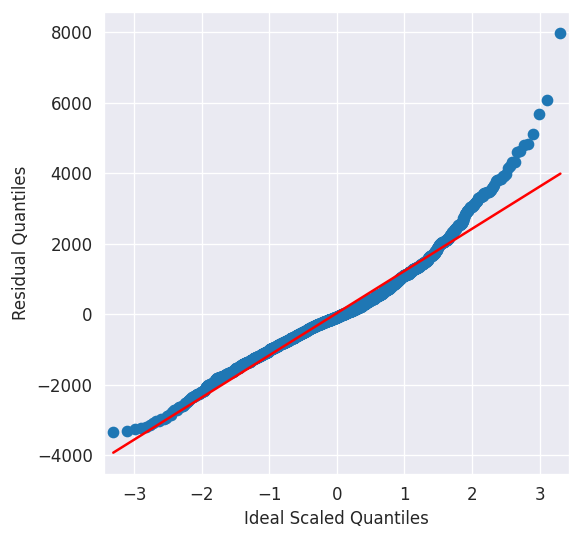

In [ ]:
# Checking QQ-plot
from statsmodels.graphics.gofplots import qqplot
fig, ax = plt.subplots(figsize=(5,5), dpi = 120)
qqplot(resds, line = 's', ax = ax)
plt.xlabel('Ideal Scaled Quantiles')
plt.ylabel('Residual Quantiles')
plt.show()

**Conclusion:**QQ-plot verifies histogram results about residuals, it fits well except for a few outliers. The data mostly normal in nature, but there are some outliers on the higher end of the Residues.

In [ ]:
#Calculating Variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index = df.columns)
vif

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

**Conclusion:** It has no value over 5, it mean ther aren't features that exhibit multicollinearity in the dataset. VIF only works for continuous variables.